<a href="https://colab.research.google.com/github/aneeshcheriank/approaching-any-machine-learning-problem/blob/main/Arranging_Machine_Learning_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Folder Structure

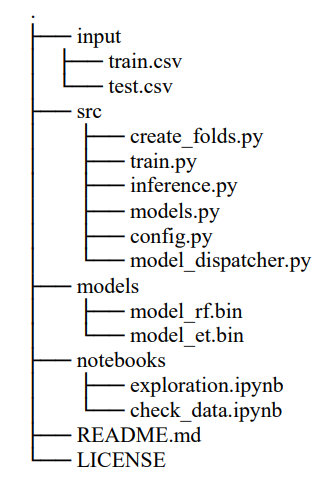

## input
- all the input for the model
- for NLP project you can place your embeddings here

## src
- all python scripts

## models
- trained models

## notebooks
- All jupyter notebooks

## README.md
- mardown file
- project description
- how to train the model or to serve this in a production environment

## LICENSE
- license of the project
  - MIT
  - Apache


# MNIST Dataset

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets


# download the data
(x_train, y_train), (x_test, y_train) = datasets.mnist.load_data()

print(f'train shape: {x_train.shape}')
print(f'test shape: {x_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
train shape: (60000, 28, 28)
test shape: (10000, 28, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

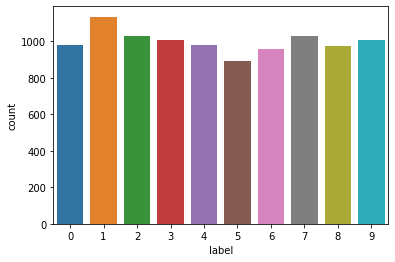

In [7]:
# target counts
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(6, 4))
sns.countplot(y_train);
plt.xlabel('label')
plt.ylabel('count')

In [ ]:
# src/train.py
import joblib
import pandas as pd
from sklearn import metrics
from sklearn import tree

def run(fold):
  # read the training data with folds
  df = pd.read_csv('../input/mnist_train_folds.csv')

  # training data is where kfold is not equal to provided fold 
  # also. not ethat we rest the index
  df_train = df[df.kfold != fold].reset_index(drop=True)

  # validation_data is where kfold is equal to provided fold
  df_valid = df[df.kfold == fold].reset_index(drop=True)

  # drop the label colum form dataframe and convert it to 
  # a numpy array by using .values.
  # target is label column in the dataframe
  x_train = df_train.drop('label', axis=1).values
  y_train = df_train.label.values

  # Similary, for validation we have
  x_valid = df_valid.drop('label', axis=1).values
  y_valid = df_valid.label.values

  # initialize simple decision tree classifer form sklearn
  clf = tree.DecisionTreeClassifer()

  # fit the model on training data
  clf.fit(x_train, y_train)

  # create predictions for validation samples
  preds = clf.predict(x_valid)

  #calculate and print accurcay
  accuracy = metrics.accuracy_score(y_valid, preds)
  print(f'Fold: {fold}, accuracy: {accuracy}')

  # save the model
  joblib.dump(clf, f'../models/dt_{fold}.bin')

  if __name__ == '__main__':
    run(fold=0)
    run(fold=1)
    run(fold=2)
    run(fold=3)
    run(fold=4)

- some folder names are hadcoded here
  - training file
  - model folder
- we can create a config file with all this information
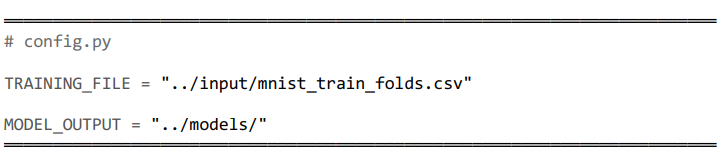

- sometime the function fail due to memory contrains
  - to solve this we can use argparse

In [ ]:
import argparse

if __name__ == '__main__':
  parser = argparse.ArgumentParser()

  parser.add_argument(
      '--fold',
      type=int
  )

  args = parser.parse_args()

  run(fold=args.fold)

## to run the code as a python script
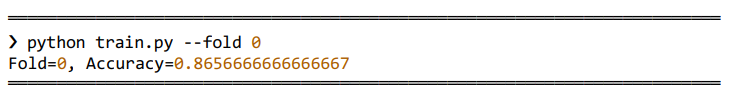

- you can even create a shell script to run the train on diff folds


`#!/bin/sh`
<br>
`python train.py --fold 0`<br>
`python train.py --fold 1`<br>
`python train.py --fold 2`<br>
`python train.py --fold 3`<br>
`python train.py --fold 4`<br>


## model_dispatcher.py
- define 2 models
  - one with gini
  - one with entropy

In [9]:
from sklearn import tree

# model_dispatcher.py
models = {
    'decision_tree_gini': tree.DecisionTreeClassifier(criterion='gini'),
    'decision_tree_entropy': tree.DecisionTreeClassifier(criterion='entropy')
}

In [ ]:
# train.py

import argparse
import os

import joblib
import pandas as pd
from sklearn import metrics

# import config
# import model_dispacher

def run(fold, model):
  df = pd.read_csv(config.Training_FILE)

  # training data is where kfold is not equal to provided fold
  # also, note that we reset the index
  df_train = df[df.kfold != fold].reset_index(drop=True)

  # validation data is where kfold is equal to provided fold
  df_valid = df[df.kfold == fold].reset_index(drop=True)

  # drop the label column from dataframe and convert it to
  # a numpy array by using .values.
  # target is label column in the dataframe
  x_train = df_train.drop("label", axis=1).values
  y_train = df_train.label.values

  # similarly, for validation, we have
  x_valid = df_valid.drop("label", axis=1).values
  y_valid = df_valid.label.values

  # fetch the model from model_dispatcher
  clf = model_dispatcher.models[model]

  # fir the model on training data
  clf.fit(x_train, y_train)

  # create predictions for validation samples
  preds = clf.predict(x_valid)

  # calculate & print accuracy
  accuracy = metrics.accuracy_score(y_valid, preds)
  print(f"Fold={fold}, Accuracy={accuracy}")

  # save the model
  joblib.dump(
  clf,
  os.path.join(config.MODEL_OUTPUT, f"dt_{fold}.bin")
  )

if __name__ == "__main__":
  parser = argparse.ArgumentParser()
  parser.add_argument(
      "--fold",
      type=int
  )
  parser.add_argument(
     "--model",
      type=str
  )
  args = parser.parse_args()
  run(
     fold=args.fold,
     model=args.model
  )